In [1]:
import os

network_path = os.path.join("networks", "input_tuning_verification")

In [2]:
from snudda.init import SnuddaInit
si = SnuddaInit(network_path=network_path, struct_def={})

si.define_striatum(num_dSPN=16, num_iSPN=16, num_FS=16, num_LTS=2, num_ChIN=2,
                   volume_type="cube")
si.write_json()

Using cube for striatum
Adding neurons: FS from dir $SNUDDA_DATA/neurons/striatum/fs
Adding neurons: dSPN from dir $SNUDDA_DATA/neurons/striatum/dspn
Adding neurons: iSPN from dir $SNUDDA_DATA/neurons/striatum/ispn
Adding neurons: ChIN from dir $SNUDDA_DATA/neurons/striatum/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002],[-0.0001],[-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[-0.0001],[3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[0.0001],[-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[0.0001],[3.e-05]) = [1.84256218e-10]
LTS axon density P([0.0009],[-0.0001],[-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009],[-0.0001],[3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009],[0.0001],[-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009],[0.0001],[3.e-05]) = [1.72360142e-23]
Adding neurons: LTS from dir $SNUDDA_DATA/neurons/striatum/lts
Writing networks/input_tuning_verification/network-config.json


In [3]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [4]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

Instantiates par_id = 0
morph_tag = optim_chin_morph_renamed2019-11-08.swc
Instantiates par_id = 0
morph_tag = lts_morp_2019-11-07_centered_no_axon.swc
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 31/125 (52 neurons)
Processing hyper voxel : 32/125 (52 neurons)
Processing hyper voxel : 36/125 (51 neurons)
Processing hyper voxel : 6/125 (41 neurons)
Processing hyper voxel : 56/125 (38 neurons)
Processing hyper voxel : 37/125 (37 neurons)
Processing hyper voxel : 7/125 (29 neurons)
Processing hyper voxel : 26/125 (29 neurons)
Processing hyper voxel : 30/125 (27 neurons)
Processing hyper voxel : 11/125 (25 neurons)
Processing hyper voxel : 61/125 (21 neurons)
Processing hyper voxel : 57/125 (19 neurons)
Processing hyper voxel : 27/125 (17 neurons)
Processing hyper voxel : 35/125 (15 neurons)
Processing hyper voxel : 12/125 (13 neurons)
Processing hyper voxel : 5/125 (8 neurons)
Processing hyper voxel : 1/125 (8 neurons)
Processing hyper voxel : 52/125

In [5]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()

Read 30812 out of total 30812 synapses
Read 694 out of total 694 synapses


In [6]:
from snudda.input import SnuddaInput
sin = SnuddaInput(network_path=network_path, 
                  input_config_file=os.path.join("$SNUDDA_DATA", "input_config", 
                                                 "external-input-dSTR-scaled-v3b.json"))
sin.generate()

Writing spikes to networks/input_tuning_verification/input-spikes.hdf5


Run the simulation in the terminal window using
```
mpiexec snudda simulate networks/input_tuning_verification
```

Loading 52 neurons with 0 synapses and 421 gap junctions
Sort the traces
Sort the traces


<IPython.core.display.Javascript object>


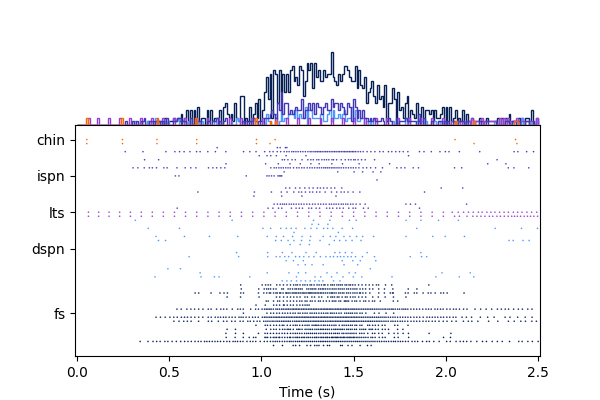

fs (16): 28.384650781265627 Hz, total spikes 1135
dspn (16): 4.326471000140047 Hz, total spikes 173
lts (2): 21.40727847468139 Hz, total spikes 107
ispn (16): 8.377848468479282 Hz, total spikes 335
chin (2): 3.2010883700458153 Hz, total spikes 16
Saving networks/input_tuning_verification/figures/network-output-spikes-666-colour.pdf


In [14]:
%matplotlib notebook

from snudda.plotting.plot_spike_raster import PlotSpikeRaster

network_file = os.path.join(network_path, "network-synapses.hdf5")
spike_file = os.path.join(network_path, "simulation", "network-output-spikes-666.txt")
type_order = ["fs", "dspn", "lts", "ispn", "chin"]

psr = PlotSpikeRaster(spike_file_name=spike_file, network_file=network_file,
                      type_order=type_order)